# Librerias

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [107]:
def superponer(imagen1, imagen2, color):
    wid, hght, channel = imagen2.shape
    
    newImage = np.copy(imagen2)

    for i in range(wid):
        for j in range(hght):
            if imagen1[i,j,0] == color[0] and imagen1[i,j,1] == color[1] and imagen1[i,j,2] == color[2]:
                newImage[i,j,:] = color
    return newImage

# Seguimiento de Límites y Códigos de cadenas
Moore boundary tracing algorithm y Algoritmo de Freeman

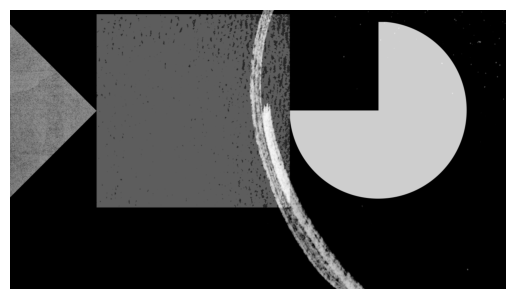

In [108]:
# Carga la imagen
circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)

circle = cv2.imread('../../IMAGES/1674674548143.png', 0)

# Binarizacion
_, imgBin = cv2.threshold(circle, 90, 255, cv2.THRESH_BINARY)

# Mostrar la imagen
plt.axis("off")
plt.imshow(circle, cmap='gray')

# Conectividad 8

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 

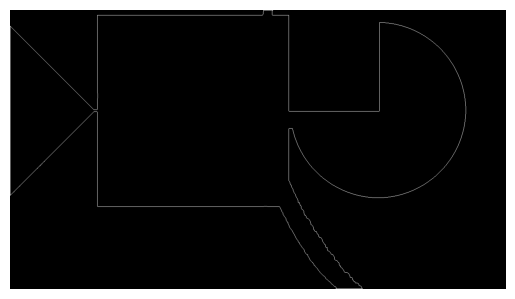

In [109]:
import sys
sys.path.append('../../FUNCIONES/SEGMENTACION')
from chain import MooreFree8
resultados8 = MooreFree8(circle)

# Imprimir lista de direcciones8
print(resultados8[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados8[0], cmap='gray')

In [110]:
from chain import minimum_magnitude

chain8 = np.array(resultados8[1])
min8 = minimum_magnitude(chain8)
print(min8)

[0 0 0 ... 2 2 2]


In [111]:
from chain import first_difference

dis8 = first_difference(min8, 8)
print(dis8)


[0 0 0 ... 0 0 6]


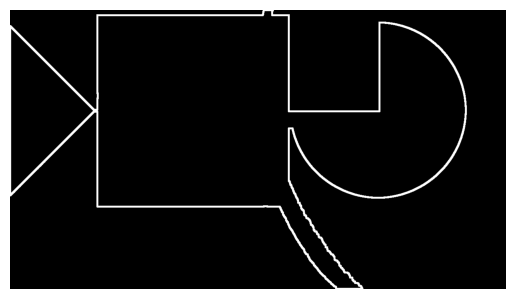

In [112]:
kernel = np.ones((5,5), np.uint8)
border_dil8 = cv2.dilate(resultados8[0], kernel, iterations=1)
plt.axis("off")
plt.imshow(border_dil8, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


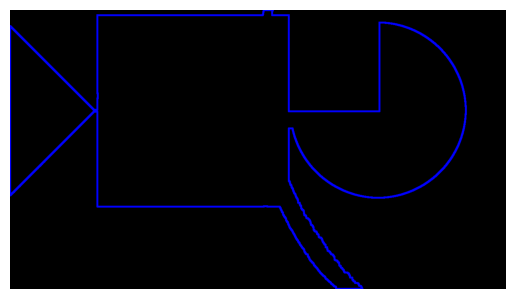

In [113]:
color_to_change = (0, 0, 255)
color_border8 = np.zeros((border_dil8.shape[0], border_dil8.shape[1], 3))
white_pixels = np.where(border_dil8 == 255)

for coords in zip(*white_pixels):
    color_border8[coords] = color_to_change

black_pixels = np.where(border_dil8 == 0)
for coords in zip(*black_pixels):
    color_border8[coords] = (0, 0, 0)

plt.axis("off")
plt.imshow(color_border8)

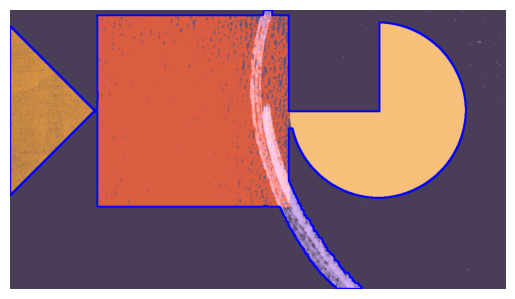

In [114]:
mask_border8 = superponer(color_border8, circleC, color_to_change)
plt.axis("off")
plt.imshow(mask_border8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


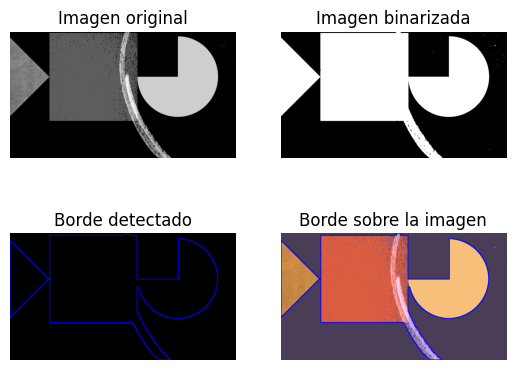

Cadena de Freeman:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,

In [115]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(circle, cmap='gray')
ax[0,0].axis("off")
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(imgBin, cmap='gray')
ax[0,1].axis("off")
ax[0,1].set_title('Imagen binarizada')
ax[1,0].imshow(color_border8)
ax[1,0].axis("off")
ax[1,0].set_title('Borde detectado')
ax[1,1].imshow(mask_border8)
ax[1,1].axis("off")
ax[1,1].set_title('Borde sobre la imagen')
plt.show()
print('Cadena de Freeman:')
print(resultados8[1])
print('Minimum Magnitude:')
for i in range(len(min8)):
    print(min8[i], end=" ")
print('\nFirst Difference:')
for i in range(len(dis8)):
    print(dis8[i], end=" ")

# Conectividad 4

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 

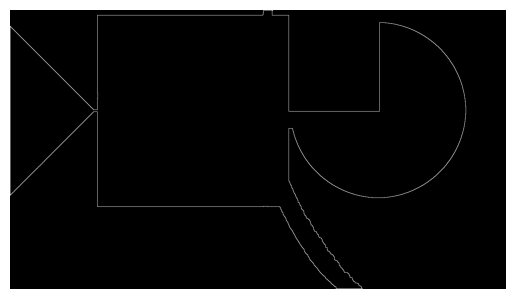

In [116]:
from chain import MooreFree4
resultados4 = MooreFree4(circle)

# Imprimir lista de direcciones4
print(resultados4[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados4[0], cmap='gray')

print(resultados4[0].shape)

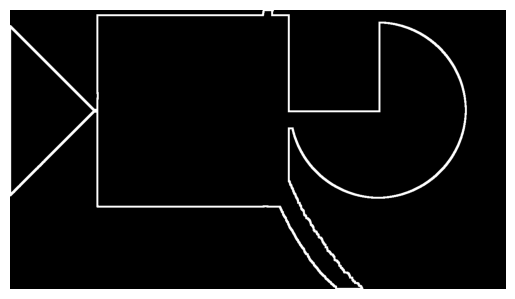

In [117]:
border_dil4 = cv2.dilate(resultados4[0], kernel, iterations=1)
plt.axis("off")
plt.imshow(border_dil4, cmap='gray')

In [118]:
chain4 = np.array(resultados4[1])
min4 = minimum_magnitude(chain4)
for i in range(len(min4)):
    print(min4[i], end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [119]:
dis4 = first_difference(min4, 4)
for i in range(len(dis4)):
    print(dis4[i], end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


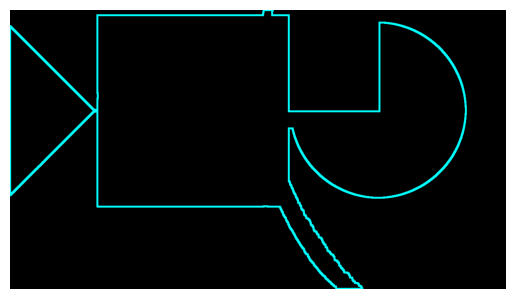

In [120]:
color_to_change = (0, 255, 255)
color_border4 = np.zeros((border_dil4.shape[0], border_dil4.shape[1], 3))
white_pixels = np.where(border_dil4 == 255)

for coords in zip(*white_pixels):
    color_border4[coords] = color_to_change

black_pixels = np.where(border_dil4 == 0)
for coords in zip(*black_pixels):
    color_border4[coords] = (0, 0, 0)

plt.axis("off")
plt.imshow(color_border4)

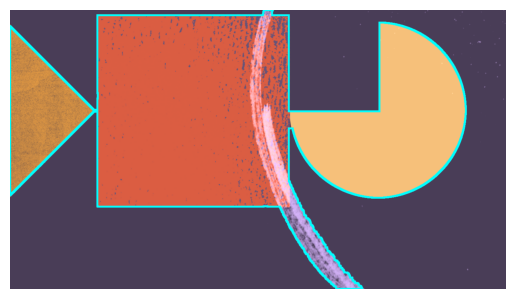

In [121]:
mask_border = superponer(color_border4, circleC, color_to_change)
plt.axis("off")
plt.imshow(mask_border)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


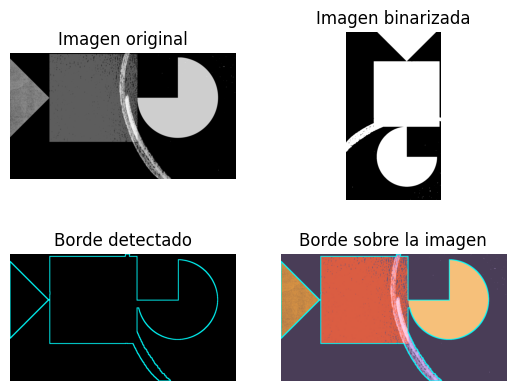

Cadena de Freeman:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,

In [131]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(circle, cmap='gray')
ax[0,0].axis("off")
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(imgBin, cmap='gray')
ax[0,1].axis("off")
ax[0,1].set_title('Imagen binarizada')
ax[1,0].imshow(color_border4)
ax[1,0].axis("off")
ax[1,0].set_title('Borde detectado')
ax[1,1].imshow(mask_border)
ax[1,1].axis("off")
ax[1,1].set_title('Borde sobre la imagen')
plt.show()
print('Cadena de Freeman:')
print(resultados8[1])
print('Minimum Magnitude:')
for i in range(len(min4)):
    print(min4[i], end=" ")
print('\nFirst Difference:')
for i in range(len(dis4)):
    print(dis4[i], end=" ")

# Imagen rotada

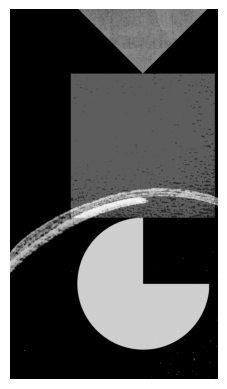

In [123]:
# Carga la imagen
circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)
circleCr = cv2.rotate(circleC, cv2.ROTATE_90_CLOCKWISE)

circle = cv2.imread('../../IMAGES/1674674548143.png', 0)

rotada = cv2.rotate(circle, cv2.ROTATE_90_CLOCKWISE)

# Binarizacion
_, imgBin = cv2.threshold(rotada, 90, 255, cv2.THRESH_BINARY)

# Mostrar la imagen
plt.axis("off")
plt.imshow(rotada, cmap='gray')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

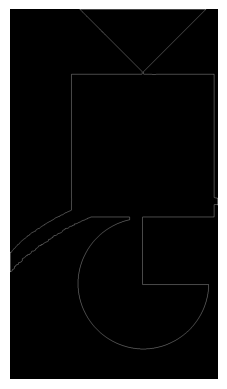

In [124]:
resultados8_r = MooreFree8(rotada)

# Imprimir lista de direcciones8
print(resultados8_r[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados8_r[0], cmap='gray')

print(resultados8_r[0].shape)

In [125]:
chain8r = np.array(resultados8_r[1])
min8r = minimum_magnitude(chain8r)
print(min8r)

[0 0 0 ... 3 3 3]


In [126]:
dis8r = first_difference(min8r, 8)
print(dis8r)

[0 0 0 ... 0 0 5]


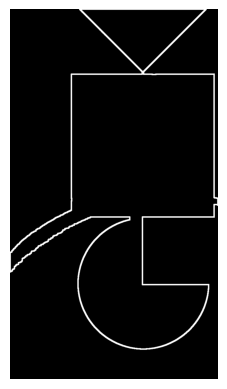

In [127]:
border_dil8 = cv2.dilate(resultados8_r[0], kernel, iterations=1)
plt.axis("off")
plt.imshow(border_dil8, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


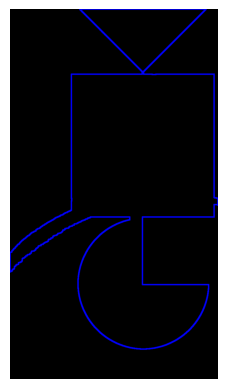

In [128]:
color_to_change = (0, 0, 255)
color_border8 = np.zeros((border_dil8.shape[0], border_dil8.shape[1], 3))
white_pixels = np.where(border_dil8 == 255)

for coords in zip(*white_pixels):
    color_border8[coords] = color_to_change

black_pixels = np.where(border_dil8 == 0)
for coords in zip(*black_pixels):
    color_border8[coords] = (0, 0, 0)

plt.axis("off")
plt.imshow(color_border8)

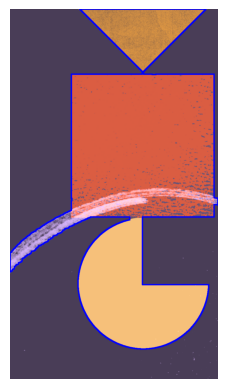

In [129]:
mask_border8 = superponer(color_border8, circleCr, color_to_change)
plt.axis("off")
plt.imshow(mask_border8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


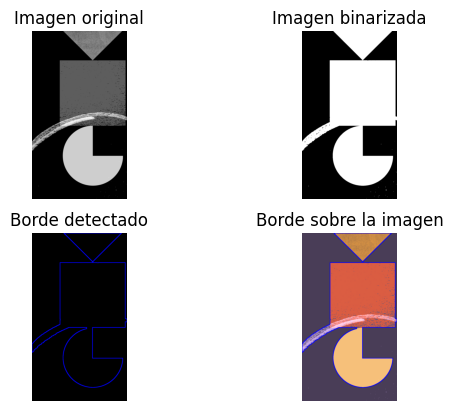

Cadena de Freeman:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(rotada, cmap='gray')
ax[0,0].axis("off")
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(imgBin, cmap='gray')
ax[0,1].axis("off")
ax[0,1].set_title('Imagen binarizada')
ax[1,0].imshow(color_border8)
ax[1,0].axis("off")
ax[1,0].set_title('Borde detectado')
ax[1,1].imshow(mask_border8)
ax[1,1].axis("off")
ax[1,1].set_title('Borde sobre la imagen')
plt.show()
print('Cadena de Freeman:')
print(resultados8_r[1])
print('Minimum Magnitude:')
for i in range(len(min8r)):
    print(min8r[i], end=" ")
print('\nFirst Difference Rotate:')
for i in range(len(dis8r)):
    print(dis8r[i], end=" ")
print('\nFirst Difference Original:')
for i in range(len(dis8)):
    print(dis8[i], end=" ")